In [1]:
import sys
sys.path.insert(0, "../")

from PlayerDB import PlayerDB

In [2]:
db = PlayerDB()
db.populate_from_csv("../tennis_pointbypoint/pbp_matches_atp_main_current.csv")

Lets pretend we have a match between Roger Federer and Novak Djokovic, and that Roger is serving. We want to compute, for each state in the game, the probability that Roger wins the point, compared to the probability that Novak wins the point.

In [18]:
from PlayerMC import STATE_TRANSITIONS
import numpy as np

server = 'Diego Schwartzman'
returner = 'Diego Schwartzman'

server_ps = db.get_player_mc(server).get_player_serve_probabilities()
server_counts = db.get_player_mc(server).get_player_serve_counts()
returner_ps = db.get_player_mc(returner).get_player_return_probabilities()
returner_counts = db.get_player_mc(returner).get_player_return_counts()

serve_ps_plot = []
return_ps = []
serve_ps_error = []
return_ps_error = []
for state in STATE_TRANSITIONS:
    serve_ps_plot.append(p1:=server_ps[state][STATE_TRANSITIONS[state][0]])
    n1 = server_counts[state][STATE_TRANSITIONS[state][0]] + server_counts[state][STATE_TRANSITIONS[state][1]]
    serve_ps_error.append(np.sqrt(p1 * (1-p1) / n1))

    #On return, the second element indicates a win
    return_ps.append(p2:=returner_ps[state][STATE_TRANSITIONS[state][1]])
    n2 = returner_counts[state][STATE_TRANSITIONS[state][0]] + returner_counts[state][STATE_TRANSITIONS[state][1]]
    return_ps_error.append(np.sqrt(p2 * (1-p2) / n2))

/var/folders/_b/8jgpfkts3v3407nwh6vr19mc0000gn/T/ipykernel_36181/2043037216.py:19: RuntimeWarning: invalid value encountered in scalar divide
  serve_ps_error.append(np.sqrt(p1 * (1-p1) / n1))
/var/folders/_b/8jgpfkts3v3407nwh6vr19mc0000gn/T/ipykernel_36181/2043037216.py:24: RuntimeWarning: invalid value encountered in scalar divide
  return_ps_error.append(np.sqrt(p2 * (1-p2) / n2))


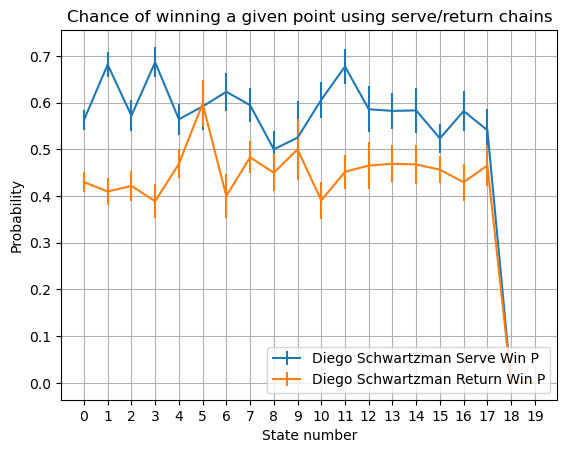

In [19]:
import matplotlib.pyplot as plt

plt.errorbar(STATE_TRANSITIONS.keys(), serve_ps_plot, yerr=serve_ps_error, label=f'{server} Serve Win P')
plt.errorbar(STATE_TRANSITIONS.keys(), return_ps, yerr = return_ps_error, label=f'{returner} Return Win P')
plt.title(f'Chance of winning a given point using serve/return chains')
plt.legend(loc = 'lower right')
plt.xlabel('State number')
plt.ylabel('Probability')
plt.xticks([i for i in STATE_TRANSITIONS])
plt.grid()